# Manuscript Figure 1: A Zoology of Dimensionality Reduction Outcomes

Comparing dimensionality reduction algorithms (DRAs) side-by-side at different hyperparameter settings shows a diversity of potential features and outcomes.  In this notebook, we show how t-SNE and UMAP embeddings show considerable variation in the structures present in embeddings of different data sets.

In [1]:
from EMBEDR import EMBEDR, EMBEDR_sweep
from EMBEDR.human_round import *
import EMBEDR.plots.EMBEDR_Figure_01v1_DimRed_Zoology as F01
import EMBEDR.plotting_utility as putl

import matplotlib
import matplotlib.gridspec as gs
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scanpy as sc
import seaborn as sns
from sklearn.metrics import pairwise_distances as pwd
import warnings

%matplotlib inline

warnings.filterwarnings("ignore", message="This figure includes Axes that")
warnings.filterwarnings("ignore", message="tight_layout not applied: ")

### Set runtime parameters here...

While many of these parameters can be ignored by users, we make them explicit here to show some of the options available when using EMBEDR.  Most important, however, is to give your project a **name** and a **directory** in which it can store intermediate results.  EMBEDR has been written to be efficient with memory and time, but for larger hyperparameter sweeps this can still result in saving dozens of files, so specifying this directory can help with project management down the road.

In [2]:
## Project details
project_name = "EMBEDR_Figure_01v1_DimRedZoology"
project_dir = "/home/emj760/../../projects/b1042/ejohnson/projects/Figures/"

## Set parameters at which to plot data.
## In this script, we'll be exploring t-SNE and UMAP, each at two parameter values,
## hence the list of tuples.
DR_params = [('tSNE', 10),
             ('UMAP', 15),
             ('tSNE', 120),
             ('UMAP', 150)]

## Set other parameters
n_components   = 2         ## Embedding dimension.
n_data_embed   = 3         ## How many data embeddings to generate (we do 3 here for later figures).
n_null_embed   = 1         ## How many null embeddings to generate.
random_seed    = 1
initialization = 'random'  ## Random initialization of t-SNE and UMAP are advised
                           ## so as to avoid local minima.
n_jobs         = -1        ## Use all available cores.

### Load the data and metadata

Here we load the Tabula Muris Marrow data set.  The data is stored as an `anndata` object, so we load it with the scanpy package.  The metadata are then stored as the `.obs` attribute.

In [3]:
## Select which data to use
seq_type = "FACS"
tissue = "Marrow"

## Path to data.
data_dir = f"../../data/tabula-muris/04_facs_processed_data/"

## Load the data
data = sc.read_h5ad(os.path.join(data_dir, f"{seq_type}/Processed_{tissue.title()}.h5ad"))

## Save the metadata
metadata = data.obs

## Use the first 50 PCs
X = data.obsm['X_pca']
n_samples, n_features = X.shape
print(f"Input data `X` is {n_samples} x {n_features}!")

## Clear the full data structure if memory is a concern.
del data

Input data `X` is 4771 x 50!


### Run EMBEDR for each of the parameter combinations.

In this case, we simply want a single embedding for each combo, so this shouldn't take very long.

In [4]:
embObjs = {}
for alg, param in DR_params:
    
    ## If we're doing t-SNE, then we use the `perplexity` parameter...
    if alg.lower() == 'tsne':
        perp = param
        n_neib = None
    ## If we're doing UMAP, then we use the `n_neighbors` parameter.
    else:
        perp = None
        n_neib = param

    ## Initialize a new object at each loop.
    embObj = EMBEDR(X=X,
                    n_jobs=n_jobs,
                    random_state=random_seed,
                    n_data_embed=n_data_embed,
                    n_null_embed=n_null_embed,
                    n_components=n_components,
                    DRA=alg,             ## HERE WE SET DRA
                    perplexity=perp,     ## HERE WE SET HYPERPARAMETERS
                    n_neighbors=n_neib,
                    project_name=project_name,
                    project_dir=project_dir,
                    verbose=1)
    embObj.fit(X) ## Use `fit` to generate the embeddings.
    
    embObjs[(alg, param)] = embObj


---> Finding 32 nearest neighbors to query points in existing kNN graph using an approximate search and the 'euclidean'' metric...
---> Time Elapsed: 0.75 seconds!

Initialized EMBEDR.tSNE_Embed object!

Generating null 1 / 1
---> Finding 32 nearest neighbors to query points in existing kNN graph using an approximate search and the 'euclidean'' metric...
---> Time Elapsed: 0.71 seconds!

Initialized EMBEDR.tSNE_Embed object!


Generating null 1 / 1

---> Finding 362 nearest neighbors to query points in existing kNN graph using an approximate search and the 'euclidean'' metric...
---> Time Elapsed: 1.2 seconds!

Initialized EMBEDR.tSNE_Embed object!

Generating null 1 / 1
---> Finding 362 nearest neighbors to query points in existing kNN graph using an approximate search and the 'euclidean'' metric...
---> Time Elapsed: 1.2 seconds!

Initialized EMBEDR.tSNE_Embed object!

---> Finding 151 nearest neighbors to query points in existing kNN graph using an approximate search and the 'eucli

### Show the Results!

Here we can then quickly see the different results.

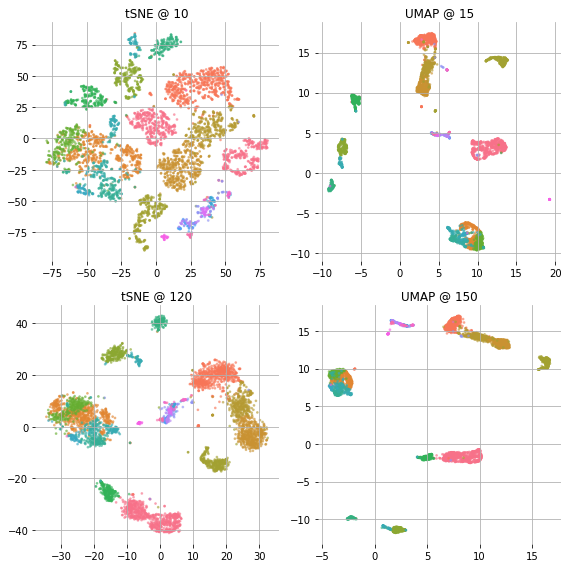

In [5]:
n_rows = n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 8))

for ii, (alg, param) in enumerate(DR_params):
    rowNo, colNo = int(ii / n_cols), int(ii % n_cols)
    axis = axes[rowNo, colNo]
    
    embObj = embObjs[(alg, param)]
    
    ## We can provide the metadata and a column name to make a plot
    ## colored by that metadata.  Using `is_categorical` coerces a
    ## categorical style, otherwise the metadata will be interpreted
    ## as a number.
    embObj.plot(plot_type='cell_ontology_class',
                metadata=metadata,
                is_categorical=True,
                cmap='husl',
                axis=axis,
                scatter_size=3,
                scatter_alpha=0.5,
                show_legend=False,
                cite_EMBEDR=False)
    
    axis.set_title(f"{alg} @ {param}")

### Improved Figures

We can also add a few details to improve the figure.  First, we set environment parameters and parameters specific to this figure.

In [7]:
## Where to save generated figures.
fig_dir = f"./Figure_01v1_DimRedZoology/"

## Show ALL axes borders (useful for gridspec setup)
show_all_axes = False  

## Environment-wide parameters.
plt.rcParams['svg.fonttype'] = 'none'
sns.set(color_codes=True)
sns.set_style('whitegrid')
matplotlib.rc("font", size=10)
matplotlib.rc("xtick", labelsize=10)
matplotlib.rc("ytick", labelsize=10)
matplotlib.rc("axes", labelsize=12)
matplotlib.rc("axes", titlesize=16)
matplotlib.rc("legend", fontsize=10)
matplotlib.rc("figure", titlesize=12)

## Figure size and gridspec size
my_dpi = 400
fig_wid = 7.2  ## inches (8 inch-wide paper minus margins)
fig_hgt = 0.8 * fig_wid
fig_pad = 0.5

## Automatically set n_rows based on conditions and n_cols.
n_cols = 2
n_rows = int(np.ceil(len(DR_params) / n_cols))

## Main gridspec parameters.
main_wspace    = 0.005
main_hspace        = 0.01
main_spns_2_show   = 'all'
main_spn_alpha     = 0.5
main_spn_width     = 1.0
main_height_ratios = [1, 1]

## Toggle for axes borders.
if show_all_axes:
    spine_alpha = 1
else:
    spine_alpha = 0
    
title_size=14
title_pad=-15

base_cmap   = sns.color_palette()
cblind_cmap = sns.color_palette('colorblind')
bright_cmap = sns.color_palette('bright')

axis_kwds = {'spines_2_show': 'all',
             'spine_alpha': 0.5,
             'spine_width': 1}

## This utility function returns several useful breakdowns of a metadata column.
processed_label = putl.process_categorical_label(metadata,
                                                 'cell_ontology_class',
                                                 cmap='colorblind')
[raw_labels, label_counts, long_labels, label_mapper, label_cmap] = processed_label

## Get the label names for the 10 largest cell types.
clust_2_label = [label_counts.index.values[cl] for cl in np.arange(10)]
print(clust_2_label)

['granulocyte', 'naive B cell', 'Slamf1-negative multipotent progenitor cell', 'precursor B cell', 'immature B cell', 'late pro-B cell', 'monocyte', 'hematopoietic precursor cell', 'granulocytopoietic cell', 'macrophage']



Saving EMBEDR_Figure_01v1_DimRedZoology to file (pdf, tiff, png)
Saving ./Figure_01v1_DimRedZoology/EMBEDR_Figure_01v1_DimRedZoology.pdf
Saving ./Figure_01v1_DimRedZoology/EMBEDR_Figure_01v1_DimRedZoology.tiff
Saving ./Figure_01v1_DimRedZoology/EMBEDR_Figure_01v1_DimRedZoology.png


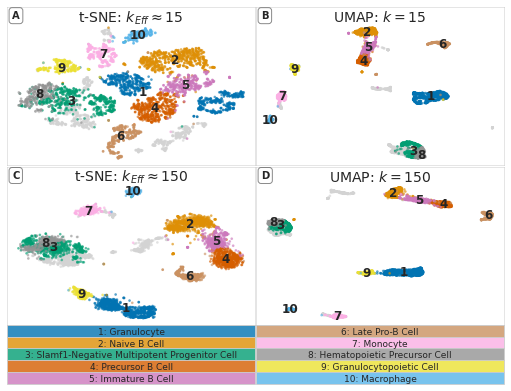

In [8]:
fig, back_axis, main_gs, main_axes = F01.make_figure_grid()

for rowNo in range(n_rows):
    for colNo in range(n_cols):
        idx = rowNo * n_cols + colNo
        embObj = embObjs[DR_params[idx]]
        axis = main_axes[rowNo][colNo]
        
        embObj.plot(plot_type='cell_ontology_class',
                    metadata=metadata,
                    is_categorical=True,
                    labels_2_show=clust_2_label,
                    cmap='colorblind',
                    axis=axis,
                    axis_kwds=axis_kwds,
                    scatter_size=3,
                    scatter_alpha=0.5,
                    show_legend=False,
                    cite_EMBEDR=False)
        
        axis = F01.add_median_labels(axis,
                                     embObj.data_Y[0],
                                     raw_labels,
                                     clust_2_label)
        
        if DR_params[idx][0].lower() == 'tsne':
            kEff = human_round(embObj.kEff)
            title = f"t-SNE: " + r"$k_{Eff} \approx $" + f"{kEff:.0f}"
        else:
            title = f"UMAP: " + r"$k = $" + f"{embObj._max_nn:.0f}"
        
        axis.set_title(title, fontsize=title_size, pad=title_pad)
        ylim = axis.get_ylim()
        axis.set_ylim(ylim[0], ylim[1] + 0.1 * (ylim[1] - ylim[0]))

fig.tight_layout(pad=fig_pad)

putl.add_panel_numbers(main_axes, edge_pad=5)

back_axis = F01.add_category_boxes(fig,
                                   back_axis,
                                   main_axes,
                                   clust_2_label,
                                   processed_label)

fig.tight_layout()

putl.save_figure(fig, project_name, fig_dir=fig_dir, formats=['pdf', 'tiff', 'png'], dpi=400)

### More Figures

We can also add more embeddings at each DRA/parameter combo to show the effect of different random seeds!


Saving EMBEDR_Figure_S01v1_DimRedZoology_Extended_byCellOnt to file (pdf, tiff, png)
Saving ./Figure_01v1_DimRedZoology/EMBEDR_Figure_S01v1_DimRedZoology_Extended_byCellOnt.pdf
Saving ./Figure_01v1_DimRedZoology/EMBEDR_Figure_S01v1_DimRedZoology_Extended_byCellOnt.tiff
Saving ./Figure_01v1_DimRedZoology/EMBEDR_Figure_S01v1_DimRedZoology_Extended_byCellOnt.png


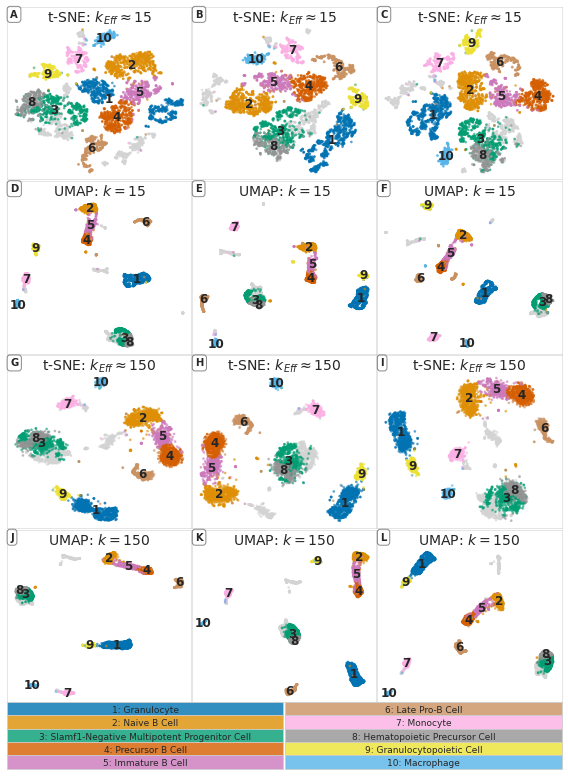

In [9]:
n_rows, n_cols = 4, 3

[fig,
 back_axis,
 main_gs,
 main_axes] = F01.make_figure_grid(n_rows=n_rows, n_cols=n_cols, fig_size=(8, 11))

for rowNo in range(n_rows):
    for colNo in range(n_cols):
        idx = rowNo * n_cols + colNo
        embObj = embObjs[DR_params[rowNo]]
        axis = main_axes[rowNo][colNo]
        
        embObj.plot(plot_type='cell_ontology_class',
                    embed_2_show=colNo,  ## Use this keyword to change the displayed embedding!
                    metadata=metadata,
                    is_categorical=True,
                    labels_2_show=clust_2_label,
                    cmap='colorblind',
                    axis=axis,
                    axis_kwds=axis_kwds,
                    scatter_size=3,
                    scatter_alpha=0.5,
                    show_legend=False,
                    cite_EMBEDR=False)
        
        axis = F01.add_median_labels(axis,
                                     embObj.data_Y[colNo],
                                     raw_labels,
                                     clust_2_label)
        
        if DR_params[rowNo][0].lower() == 'tsne':
            kEff = human_round(embObj.kEff)
            title = f"t-SNE: " + r"$k_{Eff} \approx $" + f"{kEff:.0f}"
        else:
            title = f"UMAP: " + r"$k = $" + f"{embObj._max_nn:.0f}"
        
        axis.set_title(title, fontsize=title_size, pad=title_pad)
        ylim = axis.get_ylim()
        axis.set_ylim(ylim[0], ylim[1] + 0.1 * (ylim[1] - ylim[0]))

fig.tight_layout(pad=fig_pad)

putl.add_panel_numbers(main_axes, edge_pad=3)

back_axis = F01.add_category_boxes(fig,
                                   back_axis,
                                   main_axes,
                                   clust_2_label,
                                   processed_label,
                                   text_vert_pad=-0.005)

fig.tight_layout()

fig_name = "EMBEDR_Figure_S01v1_DimRedZoology_Extended_byCellOnt"
putl.save_figure(fig, fig_name, fig_dir=fig_dir, formats=['pdf', 'tiff', 'png'], dpi=400)

Alternately, we can examine these embeddings based on intrinsic properties like the distance to a $k$th neighbor or the number of important neighbors...

In [ ]:
from EMBEDR.plots.embedr_scatterplots import Scatterplot

n_rows, n_cols = 4, 3

[fig,
 back_axis,
 main_gs,
 main_axes] = F01.make_figure_grid(n_rows=n_rows, n_cols=n_cols, fig_size=(8, 11))

for rowNo in range(n_rows):
    for colNo in range(n_cols):
        idx = rowNo * n_cols + colNo
        embObj = embObjs[DR_params[rowNo]]
        axis = main_axes[rowNo][colNo]
        
        alg, param = DR_params[rowNo]
        
        show_cbar = False
        if colNo == n_cols - 1:
            show_cbar = True
        
        if alg.lower() == 'tsne':
            cbar_ticks = [0.5, 0.75, 1., 1.25, 1.5, 1.75, 2., 2.25, 2.5]
            cbar_tlabs = [f"{human_round(10**cbt):.0f}" for cbt in cbar_ticks]
            SPL = Scatterplot(embObj.data_Y[colNo],
                              embObj._kEff,
                              fig=fig,
                              axis=axis,
                              log_labels=True,
                              cmap='magma',
                              plot_order='desc',
                              axis_kwds=axis_kwds,
                              scatter_size=3,
                              scatter_alpha=0.5,
                              show_cbar=show_cbar,
                              cbar_label=r"$k_{\mathrm{Eff}}$",
                              cbar_ticks=cbar_ticks,
                              cbar_ticklabels=cbar_tlabs,
                              cite_EMBEDR=False)
        
            kEff = human_round(embObj.kEff)
            title = f"t-SNE: " + r"$k_{Eff} \approx $" + f"{kEff:.0f}"
            
        else:
            cbar_ticks = [0.75, 1., 1.25, 1.5, 1.75, 2., 2.25, 2.5]
            cbar_tlabs = [f"{human_round(10**cbt):.0f}" for cbt in cbar_ticks]
            d99 = np.percentile(embObj.data_kNN.kNN_dst[:, param - 1], 99)
            values = np.clip(embObj.data_kNN.kNN_dst[:, param - 1], 0, d99)
            SPL = Scatterplot(embObj.data_Y[colNo],
                              embObj.data_kNN.kNN_dst[:, param - 1],
                              fig=fig,
                              axis=axis,
                              cmap='viridis',
                              plot_order='desc',
                              log_labels=True,
                              axis_kwds=axis_kwds,
                              scatter_size=3,
                              scatter_alpha=0.5,
                              show_cbar=show_cbar,
                              cbar_ticks=cbar_ticks,
                              cbar_ticklabels=cbar_tlabs,
                              cbar_label=r"Dist. to $k$th Neighbor",
                              cite_EMBEDR=False)
            
            title = f"UMAP: " + r"$k = $" + f"{embObj._max_nn:.0f}"
            
        axis = SPL.plot()
        
        axis.set_title(title, fontsize=title_size, pad=title_pad)
        ylim = axis.get_ylim()
        axis.set_ylim(ylim[0], ylim[1] + 0.1 * (ylim[1] - ylim[0]))
        
putl.add_panel_numbers(main_axes, edge_pad=3)

fig.tight_layout(pad=fig_pad)

fig_name = "EMBEDR_Figure_S01v1_DimRedZoology_Extended_byVariability"
putl.save_figure(fig, fig_name, fig_dir=fig_dir, formats=['pdf', 'tiff', 'png'], dpi=400)


Saving EMBEDR_Figure_S01v1_DimRedZoology_Extended_byVariability to file (pdf, tiff, png)
Saving ./Figure_01v1_DimRedZoology/EMBEDR_Figure_S01v1_DimRedZoology_Extended_byVariability.pdf
